In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
df = pd.read_csv("/content/Health_insurance.csv")
df.head()

#The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#convert Nomial features into numeric using OheHot encoding
df1 = pd.get_dummies(df)
df1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b85707e10>,
      dtype=object)

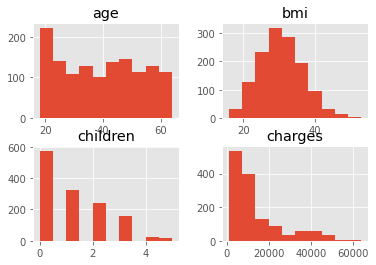

In [ ]:
df.hist()

 If the shape is symmetrical, then the mean, median, and mode are all the same value. Note that a normally distributed data set creates a symmetric histogram that looks like a bell, leading to the common term for a normal distribution: a bell curve.

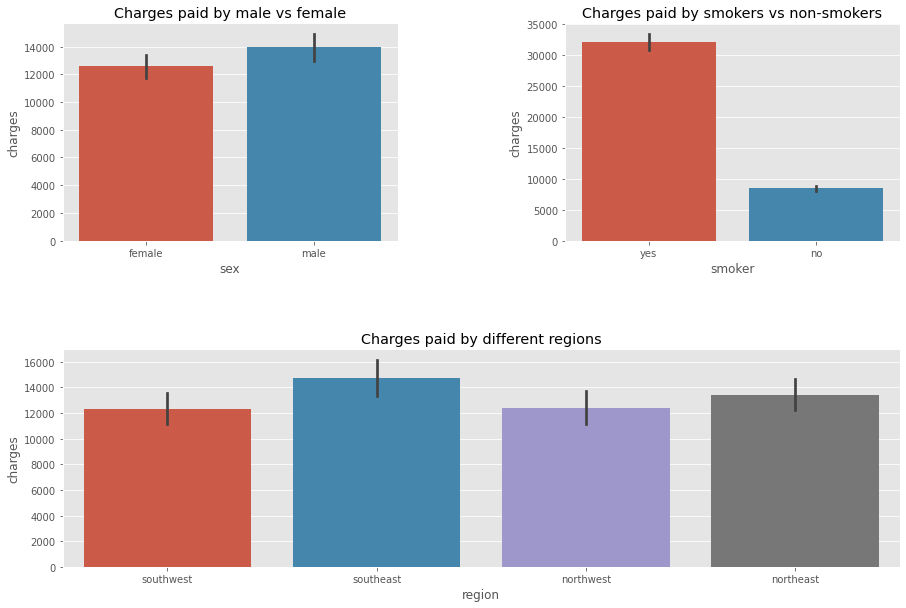

In [ ]:
ax= plt.GridSpec(2,2)
ax.update(wspace=0.5, hspace=0.5)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(ax[0,0])
sns.barplot(x='sex', y='charges', data=df).set(title="Charges paid by male vs female")
ax2 = plt.subplot(ax[0,1])
sns.barplot(x='smoker', y='charges', data=df).set(title="Charges paid by smokers vs non-smokers")
ax3 = plt.subplot(ax[1,:])
sns.barplot(x='region', y='charges', data=df).set(title="Charges paid by different regions")
plt.show()

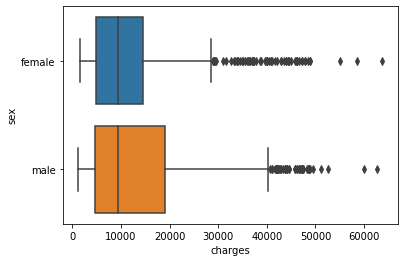

In [ ]:
sns.boxplot( x="charges", y='sex', data=df, )
plt.show()

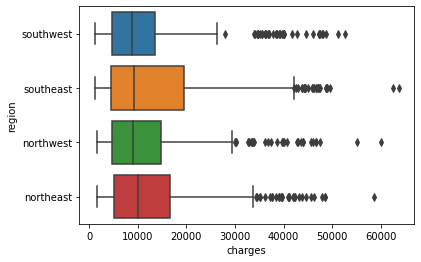

In [ ]:
sns.boxplot( x="charges", y='region', data=df, )
plt.show()

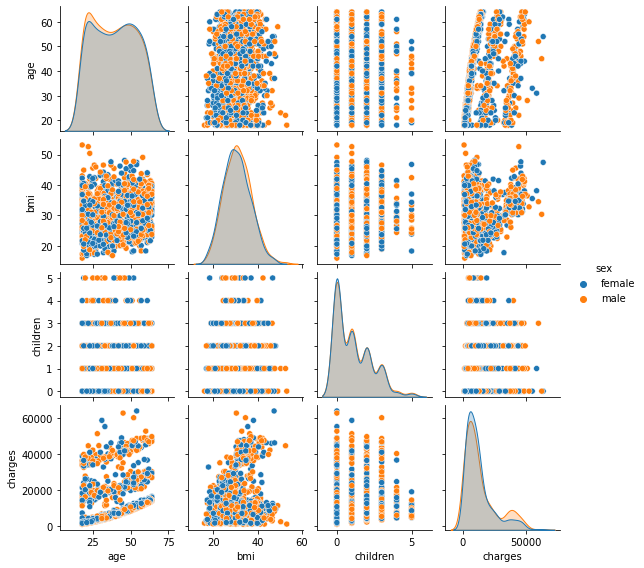

In [ ]:
sns.pairplot(df, hue='sex', height=2)

A pairs plot allows us to see both distribution of single variables and relationships between two variables.

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


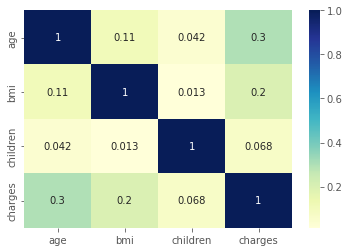

<Figure size 1080x720 with 0 Axes>

In [ ]:
# import file with data
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#plt.figure(figsize=(16, 12))
plt.figure(figsize=(15,10))
# displaying heatmap
plt.show()

#Feature selection using Best-Subset method

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_linear_reg(X,y):
    '''This function takes features X and target y, then fits a linear regression line to it.
    And then it returns the RSS, R squared and Adjusted R Squared for the said regression.'''
    linearModel = LinearRegression()
    linearModel.fit(X,y)
    RSS = mean_squared_error(y, linearModel.predict(X))*len(y)
    R_squared = linearModel.score(X,y)
    Adjusted_R_squared = 1 - (1 - R_squared)*( len(y)-1)/(len(y) - X.shape[1]-1)
    return RSS, R_squared, Adjusted_R_squared

In [ ]:
from tqdm import tnrange, tqdm_notebook #to show the ongoing calculation process
import itertools

def get_best(X,y):
    RSS_list, R_squared_list, feature_list = [], [], []
    adj_R_squared_list , num_features = [], []
    
    #for 1,then 2, then 3,.... till all k columns is considered
    for K in tnrange(1, len(X.columns)+1, desc = 'Loop...'):
        #for all K column combinations of the data
        for combo in itertools.combinations(X.columns, K):
            #For the selecting cobination of K columns from k features, calculate RSS, R_squared and Adj_R_squared
            RSS, R_s, A_R_s =  fit_linear_reg( X[list(combo)], y)
            #And the save the list of this combination
            RSS_list.append(RSS)
            R_squared_list.append(R_s)
            adj_R_squared_list.append(A_R_s)
            feature_list.append(combo)
            num_features.append(len(combo))
    #Pack all this data in a dataframe
    subset_models = pd.DataFrame({
        'num_features': num_features,
        'RSS': RSS_list,
        'R_squared': R_squared_list,
        'Adj_R_squared': adj_R_squared_list,
        'featuers':feature_list
    })
    return subset_models

In [ ]:
subset_models = get_best( X = df1.drop(columns='charges', axis=1), y=df1.charges)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':


Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

#Selecting Best feature subset based upon RSS, R squared, Adjusted R Squared

In [ ]:
subset_models

,num_features,RSS,R_squared,Adj_R_squared,featuers
0,1,1.785440e+11,0.089406,0.088724,"(age,)"
1,1,1.883608e+11,0.039339,0.038620,"(bmi,)"
2,1,1.951676e+11,0.004624,0.003879,"(children,)"
3,1,1.954306e+11,0.003282,0.002536,"(sex_female,)"
4,1,1.954306e+11,0.003282,0.002536,"(sex_male,)"
...,...,...,...,...,...
2042,10,4.883953e+10,0.750913,0.749036,"(age, bmi, children, sex_male, smoker_no, smok..."
2043,10,4.927708e+10,0.748681,0.746788,"(age, bmi, sex_female, sex_male, smoker_no, sm..."
2044,10,5.400876e+10,0.724549,0.722474,"(age, children, sex_female, sex_male, smoker_n..."
2045,10,6.596401e+10,0.663576,0.661041,"(bmi, children, sex_female, sex_male, smoker_n..."


In [ ]:
print("Based upon minimum RSS:")
display(subset_models.loc[subset_models.groupby('num_features')['RSS'].idxmin()])
print("Based upon maximum R-Squared:")
display(subset_models.loc[subset_models.groupby('num_features')['R_squared'].idxmax()])
print("Based upon maximum Adjusted R Squared:")
display(subset_models.loc[subset_models.groupby('num_features')['Adj_R_squared'].idxmax()])

Based upon minimum RSS:


,num_features,RSS,R_squared,Adj_R_squared,featuers
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_no)"
575,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker_no, region_northeast)"
1069,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker_yes, region_northe..."
1504,7,4.884047e+10,0.750908,0.749597,"(age, bmi, children, sex_female, smoker_no, re..."
1841,8,4.883953e+10,0.750913,0.749414,"(age, bmi, children, sex_female, smoker_no, re..."
1987,9,4.883953e+10,0.750913,0.749225,"(age, bmi, children, sex_female, sex_male, smo..."
2035,10,4.883953e+10,0.750913,0.749036,"(age, bmi, children, sex_female, sex_male, smo..."


Based upon maximum R-Squared:


,num_features,RSS,R_squared,Adj_R_squared,featuers
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_no)"
575,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker_no, region_northeast)"
1063,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker_no, region_northea..."
1504,7,4.884047e+10,0.750908,0.749597,"(age, bmi, children, sex_female, smoker_no, re..."
1841,8,4.883953e+10,0.750913,0.749414,"(age, bmi, children, sex_female, smoker_no, re..."
1987,9,4.883953e+10,0.750913,0.749225,"(age, bmi, children, sex_female, sex_male, smo..."
2035,10,4.883953e+10,0.750913,0.749036,"(age, bmi, children, sex_female, sex_male, smo..."


Based upon maximum Adjusted R Squared:


,num_features,RSS,R_squared,Adj_R_squared,featuers
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_no)"
575,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker_no, region_northeast)"
1063,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker_no, region_northea..."
1504,7,4.884047e+10,0.750908,0.749597,"(age, bmi, children, sex_female, smoker_no, re..."
1841,8,4.883953e+10,0.750913,0.749414,"(age, bmi, children, sex_female, smoker_no, re..."
1987,9,4.883953e+10,0.750913,0.749225,"(age, bmi, children, sex_female, sex_male, smo..."
2035,10,4.883953e+10,0.750913,0.749036,"(age, bmi, children, sex_female, sex_male, smo..."


In [ ]:
print("Best subset based upon maximum Adjusted R Squared:")
display((subset_models.loc[subset_models.groupby('num_features')['Adj_R_squared'].idxmax()]).loc[1063].to_list()[4])

Best subset based upon maximum Adjusted R Squared:


('age', 'bmi', 'children', 'smoker_no', 'region_northeast', 'region_northwest')

#Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df1[['age', 'bmi', 'children', 'smoker_no', 'region_northeast', 'region_northwest']]
y = df1.charges

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

#Building Model

In [ ]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
model

LinearRegression()

#checking accuracy

In [ ]:
def getScores(Xtrain, ytrain, Xtest, ytest, model):
    '''This function returns the RSS, R squared and Adjusted R squared of the model for train and test dataset as a Pandas DataFrame.'''
    train_RSS = mean_squared_error(ytrain, model.predict(Xtrain))*len(ytrain)
    test_RSS = mean_squared_error(ytest, model.predict(Xtest))*len(ytest)
    train_R_Sq = model.score(Xtrain, ytrain)
    test_R_Sq = model.score(Xtest, ytest)
    train_Adj_R = 1 - ( 1 - train_R_Sq)*(len(ytrain) - 1)/(len(ytrain) - Xtrain.shape[1]-1)
    test_Adj_R = 1 - ( 1 - test_R_Sq)*(len(ytest) - 1)/(len(ytest) - Xtest.shape[1]-1)
    df = pd.DataFrame({'RSS': [train_RSS, test_RSS],'R Squared': [train_R_Sq, test_R_Sq],'Adjusted R Squared': [train_Adj_R, test_Adj_R]},  index=['train', 'test'])
    return df

In [ ]:
scores = getScores(Xtrain, ytrain, Xtest, ytest, model)
print("The model performance is:")
display(scores)

The model performance is:


,RSS,R Squared,Adjusted R Squared
train,3.868511e+10,0.750094,0.748683
test,1.019709e+10,0.752941,0.747262
